In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import numpy as np  # Numerical computing library in Python, providing support for arrays, matrices, and mathematical functions.

import pandas as pd  # Data manipulation and analysis library, offering data structures like DataFrame and Series.

import matplotlib.pyplot as plt  # Part of Matplotlib library, used for creating static, interactive, and animated visualizations in Python.

import seaborn as sns  # Statistical data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

sns.set()  # Set the default aesthetic style of Seaborn for visualizations.

import warnings  # Python's standard library for issuing warnings.

warnings.filterwarnings("ignore")  # Filter out warning messages to avoid cluttering the output.

from sklearn.model_selection import train_test_split  # Function from scikit-learn used to split datasets into training and testing subsets.

from sklearn import preprocessing  # Module from scikit-learn containing various preprocessing techniques for feature scaling, normalization, encoding, etc.

from sklearn.linear_model import LogisticRegression  # Class from scikit-learn implementing logistic regression, a common classification algorithm for binary classification tasks.

from sklearn.ensemble import RandomForestClassifier  # Class from scikit-learn implementing the random forest algorithm, an ensemble learning method for classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Module from scikit-learn containing various metrics for evaluating model performance.


In [ ]:
# Load data from a CSV file into a pandas DataFrame named 'df'

df = pd.read_csv('Data (1).csv')

In [ ]:
# Display the first 5 rows of the DataFrame 'df'

df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [ ]:
df['Label'].value_counts() * 100 / len(df)

b    65.7332
s    34.2668
Name: Label, dtype: float64

In [ ]:
# Display the last 5 rows of the DataFrame 'df'

df.tail()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
249995,349995,-999.000,71.989,36.548,5.042,-999.0,-999.0,-999.0,1.392,5.042,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.0,-999.0,-999.0,2.585,22.439,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.0,-999.0,-999.0,2.390,22.183,...,1,41.992,1.8,-0.166,-999.0,-999.0,-999.0,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.0,-999.0,-999.0,3.365,13.504,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.681611,b
249999,349999,-999.000,72.756,70.831,7.479,-999.0,-999.0,-999.0,2.025,7.479,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.877474,b


In [ ]:
# Retrieve the dimensions (number of rows, number of columns) of the DataFrame 'df'.

df.shape

(250000, 33)

In [ ]:
# Display a concise summary of the DataFrame 'df', including data types, non-null values, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
# Generate descriptive statistics for the numerical columns in the DataFrame 'df'.

df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
# Count the number of missing values in each column of the DataFrame 'df'.

df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [ ]:
# Identify duplicate rows in the DataFrame 'df' and printing it

duplicate_values = df.duplicated()
print(duplicate_values.sum())

0


In [ ]:
# Creating a list for the number of columns
cols=list(df.columns)

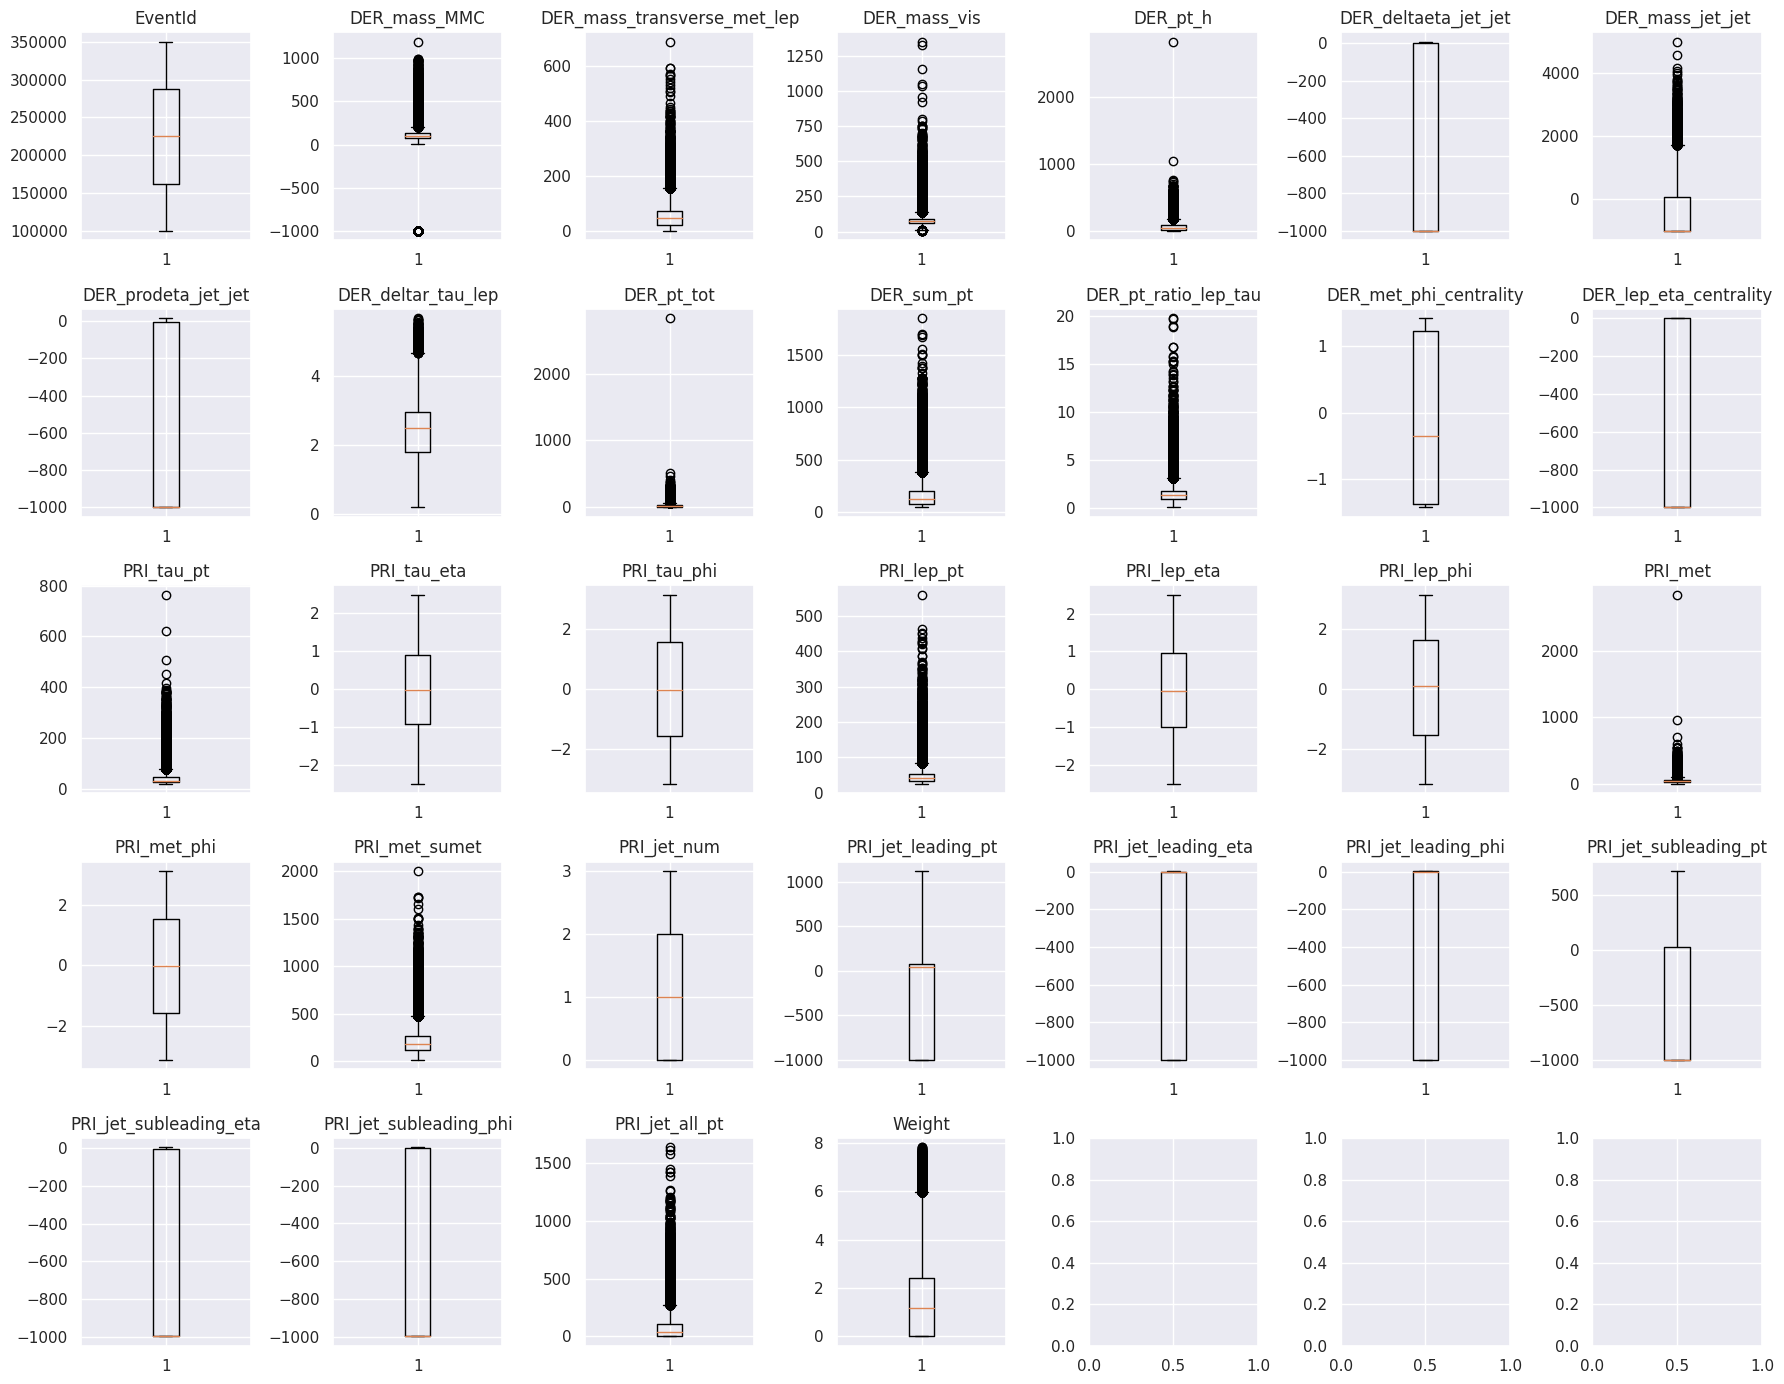

In [ ]:
# A grid of subplots containing boxplots for each numerical column in the DataFrame 'df'.
# It provides a visual summary of the distribution of each numerical column's data, including the median, quartiles, and any potential outliers.


f,ax=plt.subplots(5,7,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(5):
        for j in range(7):
            ax[i,j].boxplot(x=df[cols[ind]])
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
except:
    pass
plt.show()

In [ ]:
# This code snippet calculates interquartile range (IQR) for numerical columns in the DataFrame df. and is commonly used in exploratory data analysis and outlier detection.

Q1 = df.select_dtypes(exclude='object').quantile(0.25)
Q3 = df.select_dtypes(exclude='object').quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EventId                        124999.500000
DER_mass_MMC                       52.505500
DER_mass_transverse_met_lep        54.357000
DER_mass_vis                       32.870250
DER_pt_h                           65.100250
DER_deltaeta_jet_jet              999.490000
DER_mass_jet_jet                 1082.446000
DER_prodeta_jet_jet               994.407000
DER_deltar_tau_lep                  1.151000
DER_pt_tot                         24.750000
DER_sum_pt                        122.928250
DER_pt_ratio_lep_tau                0.894000
DER_met_phi_centrality              2.596000
DER_lep_eta_centrality            999.000000
PRI_tau_pt                         20.425250
PRI_tau_eta                         1.823000
PRI_tau_phi                         3.140000
PRI_lep_pt                         21.015000
PRI_lep_eta                         1.973000
PRI_lep_phi                         3.140000
PRI_met                            30.497000
PRI_met_phi                         3.136000
PRI_met_su

In [ ]:
# This code identifies outliers in the DataFrame df based on the calculated interquartile range (IQR).
# The outliers DataFrame contains boolean values indicating whether each value in df is an outlier or not.

upper = (Q3 + 1.5 * IQR)
lower = (Q1 - 1.5 * IQR)
outliers = (df < lower) | (df > upper)
outliers

,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_lep_eta_centrality,DER_mass_MMC,DER_mass_jet_jet,DER_mass_transverse_met_lep,DER_mass_vis,DER_met_phi_centrality,DER_prodeta_jet_jet,DER_pt_h,...,PRI_lep_eta,PRI_lep_phi,PRI_lep_pt,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_tau_eta,PRI_tau_phi,PRI_tau_pt,Weight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Cap outliers at both upper and lower limits along columns (axis=1)

df_capped = df.select_dtypes(exclude='object').clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

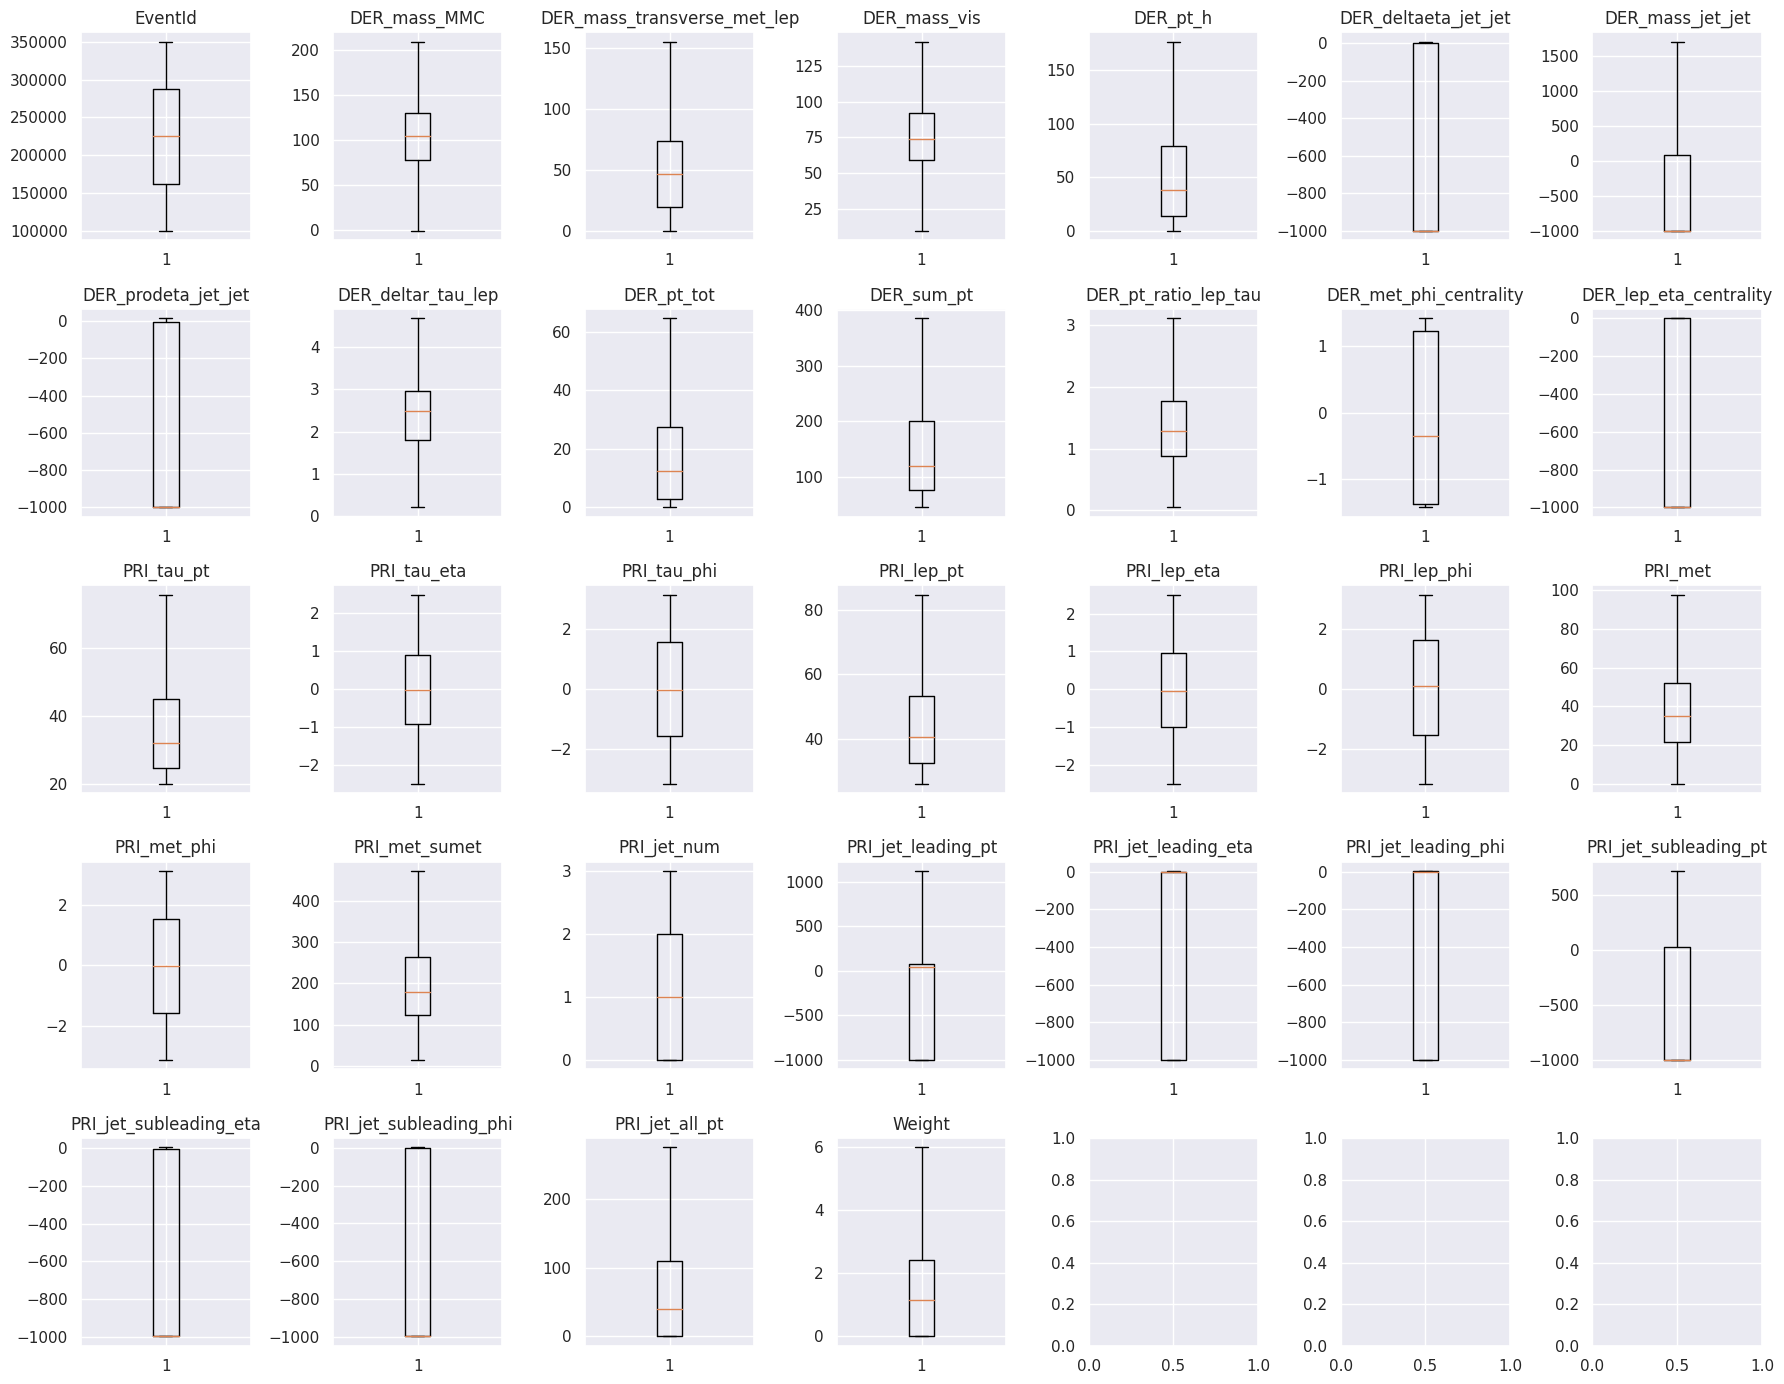

In [ ]:
# Checking if the outliers have been removed by plotting boxplots

f,ax=plt.subplots(5,7,figsize=(18,14),dpi=100)

ind=0
try:
    for i in range(5):
        for j in range(7):
            ax[i,j].boxplot(x=df_capped[cols[ind]])
            ax[i,j].set_title(cols[ind])
            ind+=1
        plt.tight_layout()
except:
    pass
plt.show()

In [ ]:
# checking skewness
# skewness = df_capped.skew()
# print("Skewness:", skewness)

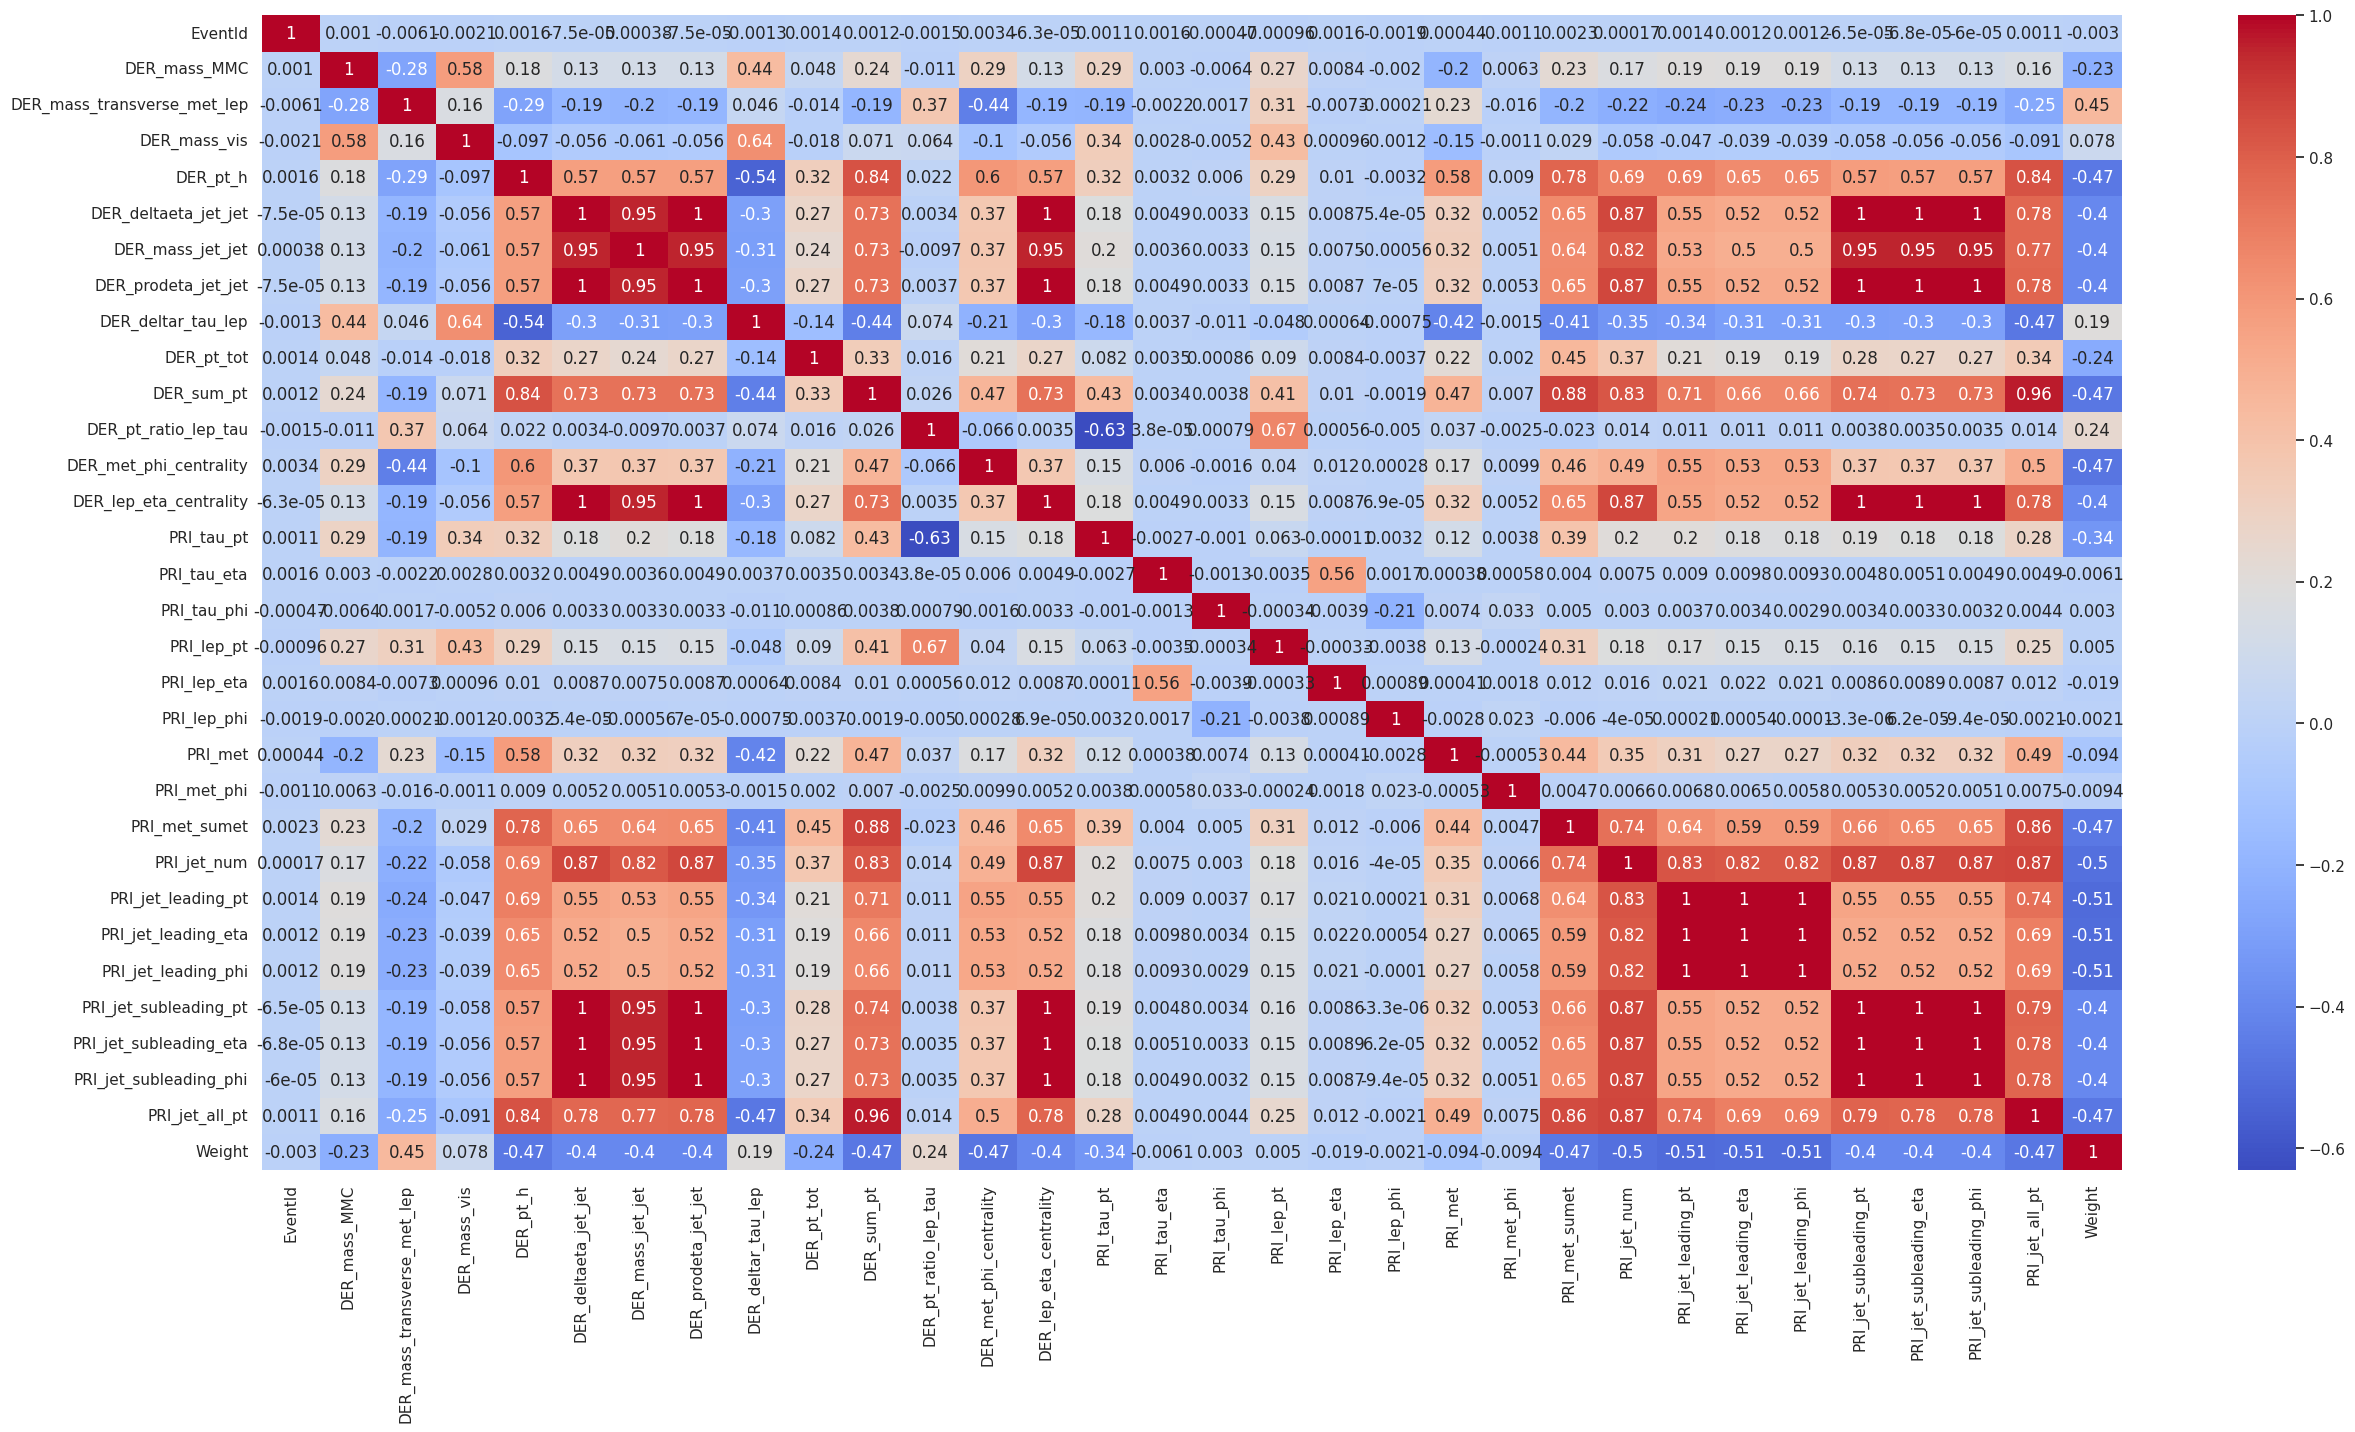

In [ ]:
# This visualization is useful for understanding the relationships between different features in the dataset.
# High positive correlations (close to 1) indicate strong positive linear relationships, while high negative correlations (close to -1)
# indicate strong negative linear relationships. A correlation coefficient close to 0 suggests no linear relationship between the variables.

plt.figure(figsize = (30,15))
correlation_matrix = df_capped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Splitting Data into dependent and independent Variable

In [ ]:
# Dropping event column from dataframe since its just representing the identifier for each event.

x = df_capped.drop(['EventId'], axis = 1)

# Taking Target variable as y

y = df['Label']

In [ ]:
x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.4700,51.6550,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,160.9370,68.7680,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,-0.6575,155.1335,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,143.9050,81.4170,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378
4,175.8640,16.9150,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.982367


In [ ]:
#Splitting into Train and Test

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.30,random_state=42,stratify=y)

In [ ]:
x_train

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
201802,110.8100,10.320,51.310,176.819375,2.888,545.566,-1.593,0.903,7.807,381.077,...,387.127,2,143.581,2.146,0.333,127.067,-0.742,0.865,270.648,0.001503
165831,130.5000,23.935,96.246,44.201000,-999.000,-999.000,-999.000,2.498,3.385,135.355,...,192.441,1,41.536,0.487,0.276,-999.000,-999.000,-999.000,41.536,0.002653
109776,110.0480,46.705,74.705,88.036000,-999.000,-999.000,-999.000,1.881,17.398,160.549,...,214.857,1,75.850,-0.639,1.393,-999.000,-999.000,-999.000,75.850,0.001502
119338,-0.6575,74.190,46.641,1.646000,-999.000,-999.000,-999.000,1.714,1.646,49.912,...,124.247,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.502476
69267,115.3160,10.205,63.730,176.819375,-999.000,-999.000,-999.000,1.644,0.128,263.332,...,206.435,1,180.378,1.166,-1.710,-999.000,-999.000,-999.000,180.378,0.001503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176223,121.7360,18.818,62.434,87.580000,-999.000,-999.000,-999.000,2.186,16.182,142.363,...,184.140,1,71.468,3.190,0.721,-999.000,-999.000,-999.000,71.468,1.681611
67040,105.4120,53.251,90.064,1.320000,-999.000,-999.000,-999.000,2.511,1.320,91.341,...,116.892,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.002653
125456,133.4510,9.894,80.190,38.472000,-999.000,-999.000,-999.000,2.492,1.480,121.471,...,146.143,1,37.449,0.349,-2.205,-999.000,-999.000,-999.000,37.449,0.018636
23113,127.1170,8.938,80.668,2.817000,3.529,256.579,-1.070,3.072,2.358,167.219,...,168.495,2,43.083,-0.335,1.142,42.030,3.194,-2.042,85.113,0.001503


In [ ]:
# Calculate the percentage distribution of classes in the y_train set to identify class imbalance

y_train.value_counts() * 100 / len(x_train)

b    65.733143
s    34.266857
Name: Label, dtype: float64

In [ ]:
# Checking the count of each unique value in the y_train series.

y_train.value_counts()

b    115033
s     59967
Name: Label, dtype: int64

<Axes: xlabel='count', ylabel='Label'>

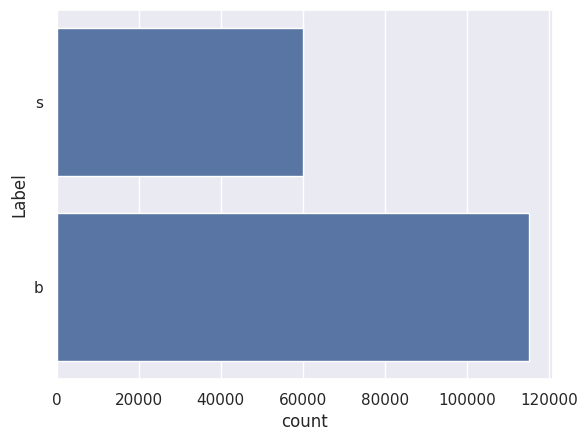

In [ ]:
# Plot the count of each unique value in y_train using seaborn's countplot.Since there is no huge class imbalance.Hence no need to treat

sns.countplot(y_train)

In [ ]:
# Building Logistic Regression Model

logit_model = LogisticRegression(solver='newton-cg')
logit_model.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
# Use the trained logistic regression model 'logit_model' to predict the target variable for the training set 'x_train'.

y_pred_train = logit_model.predict(x_train)

# Use the trained logistic regression model 'logit_model' to predict the target variable for the testing set 'x_test'.

y_pred_test = logit_model.predict(x_test)

In [ ]:
def model_report(model):
    # Use the provided model to predict the target variable for the training set.
    model_pred_train = model.predict(x_train)

    # Use the provided model to predict the target variable for the testing set.
    model_pred_test = model.predict(x_test)

    # Print the classification report for the predictions on the training set.
    print("Classification Report Train: ")
    print(classification_report(y_train, model_pred_train))

    # Print the classification report for the predictions on the testing set.
    print("Classification Report Test: ")
    print(classification_report(y_test, model_pred_test))

    # Print the accuracy score for the predictions on the training set.
    print("Accuracy Score Train: ", accuracy_score(y_train,model_pred_train))

    # Print the accuracy score for the predictions on the testing set.
    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))

    # Print the confusion matrix for the predictions on the training set.
    print("Confusion Matrix Train: ")
    print(confusion_matrix(y_train,model_pred_train))

    # Print the confusion matrix for the predictions on the testing set.
    print("Confusion Matrix Test: ")
    print(confusion_matrix(y_test,model_pred_test))


In [ ]:
# Calling model_report function and passing the logistic regression model (logit_model) as an argument.

model_report(logit_model)

Classification Report Train: 
              precision    recall  f1-score   support

           b       1.00      0.98      0.99    115033
           s       0.96      1.00      0.98     59967

    accuracy                           0.98    175000
   macro avg       0.98      0.99      0.98    175000
weighted avg       0.99      0.98      0.98    175000

Classification Report Test: 
              precision    recall  f1-score   support

           b       1.00      0.98      0.99     49300
           s       0.96      1.00      0.98     25700

    accuracy                           0.98     75000
   macro avg       0.98      0.99      0.98     75000
weighted avg       0.99      0.98      0.99     75000

Accuracy Score Train:  0.9847428571428571
Accuracy Score Test:  0.98496
Confusion Matrix Train: 
[[112561   2472]
 [   198  59769]]
Confusion Matrix Test: 
[[48280  1020]
 [  108 25592]]


In [ ]:
# Import the roc_auc_score function from the metrics module of scikit-learn.
from sklearn.metrics import roc_auc_score

# # Import the make_classification function from the datasets module of scikit-learn.
# from sklearn.datasets import make_classification

In [ ]:
y_proba = logit_model.predict_proba(x_test)[:, 1]

In [ ]:
# Calculating AUROC

auroc = roc_auc_score(y_test, y_proba)
print("AUROC:", auroc)

AUROC: 0.998229103953402


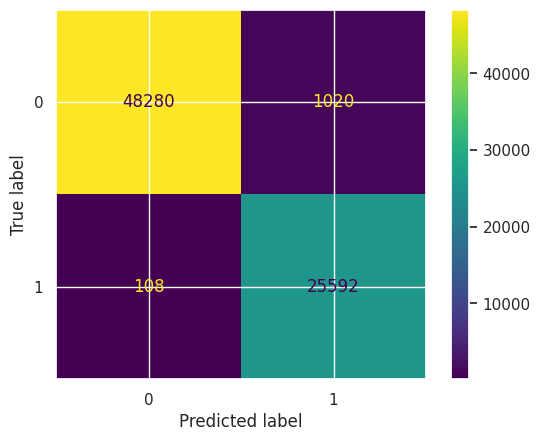

In [ ]:
# Plotting confusion matrix to visualize predictions on the testing set

from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [ ]:
# Building Random Forest Model

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# Use the trained Random Forest model 'rf' to predict the target variable for the training set 'x_train'.

y_pred_train = rf.predict(x_train)

# Use the trained Random Forest model 'rf' to predict the target variable for the test set 'x_test'.

y_pred_test = rf.predict(x_test)

In [ ]:
model_report(rf)

Classification Report Train: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00    115033
           s       1.00      1.00      1.00     59967

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

Classification Report Test: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00     49300
           s       1.00      1.00      1.00     25700

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

Accuracy Score Train:  1.0
Accuracy Score Test:  1.0
Confusion Matrix Train: 
[[115033      0]
 [     0  59967]]
Confusion Matrix Test: 
[[49300     0]
 [    0 25700]]


In [ ]:
# Feature Importance using Random Forest.
# Visualizing feature importance can provide insights into which features are most influential in making predictions.

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on your data
rf_classifier.fit(x_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a list of (importance, feature name) tuples
feature_importance_tuples = [(importance, name) for importance, name in zip(feature_importances, x)]

# Sort the list by importance in descending order
sorted_list = feature_importance_tuples.sort(reverse=True)

# Print top 10 features
print("Top 10 features:")
for i in range(10):
    print(f"{i+1}. {feature_importance_tuples[i][1]}: {feature_importance_tuples[i][0]}")

Top 10 features:
1. Weight: 0.7684529315898665
2. DER_mass_MMC: 0.05866058639454903
3. DER_mass_transverse_met_lep: 0.038272409842185516
4. DER_mass_vis: 0.020864478855230847
5. PRI_tau_pt: 0.017646869478730235
6. DER_pt_ratio_lep_tau: 0.014025714640675417
7. DER_met_phi_centrality: 0.013002047422951316
8. DER_deltaeta_jet_jet: 0.008577936018712387
9. DER_deltar_tau_lep: 0.006918593360880212
10. DER_mass_jet_jet: 0.006709641696197064


In [ ]:
feature_importance_tuples[0][1]

'Weight'

In [ ]:
# Assuming feature_importance_tuples is already sorted
top_10 = [x[1] for x in feature_importance_tuples[:10]]
print("Top 10 features:")
for i, feature in enumerate(top_10):
    print(f"{i+1}. {feature}")


Top 10 features:
1. Weight
2. DER_mass_MMC
3. DER_mass_transverse_met_lep
4. DER_mass_vis
5. PRI_tau_pt
6. DER_pt_ratio_lep_tau
7. DER_met_phi_centrality
8. DER_deltaeta_jet_jet
9. DER_deltar_tau_lep
10. DER_mass_jet_jet


In [ ]:
top_10

['Weight',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'PRI_tau_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_deltaeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_mass_jet_jet']

In [ ]:
#Splitting Data into dependent and independent Variable.Taking x as Top 10 features and y as target

x=df[top_10]
y=df['Label']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.30,random_state=42)

In [ ]:
logit_model1 = LogisticRegression(solver='newton-cg')
logit_model1.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
y_pred_train = logit_model1.predict(x_train)
y_pred_test = logit_model1.predict(x_test)

In [ ]:
def model_report(model):
    model_pred_train = model.predict(x_train)
    model_pred_test = model.predict(x_test)
    print("Classification Report Train: ")
    print(classification_report(y_train, model_pred_train))
    print("Classification Report Test: ")
    print(classification_report(y_test, model_pred_test))
    print("Accuracy Score Train: ", accuracy_score(y_train,model_pred_train))
    print("Accuracy Score Test: ", accuracy_score(y_test,model_pred_test))
    print("Confusion Matrix Train: ")
    print(confusion_matrix(y_train,model_pred_train))
    print("Confusion Matrix Test: ")
    print(confusion_matrix(y_test,model_pred_test))

In [ ]:
model_report(logit_model1)

Classification Report Train: 
              precision    recall  f1-score   support

           b       1.00      0.98      0.99    114778
           s       0.96      1.00      0.98     60222

    accuracy                           0.99    175000
   macro avg       0.98      0.99      0.99    175000
weighted avg       0.99      0.99      0.99    175000

Classification Report Test: 
              precision    recall  f1-score   support

           b       1.00      0.98      0.99     49555
           s       0.96      1.00      0.98     25445

    accuracy                           0.99     75000
   macro avg       0.98      0.99      0.99     75000
weighted avg       0.99      0.99      0.99     75000

Accuracy Score Train:  0.9874571428571428
Accuracy Score Test:  0.98648
Confusion Matrix Train: 
[[112587   2191]
 [     4  60218]]
Confusion Matrix Test: 
[[48541  1014]
 [    0 25445]]


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [ ]:
model_report(rf)

Classification Report Train: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00    114778
           s       1.00      1.00      1.00     60222

    accuracy                           1.00    175000
   macro avg       1.00      1.00      1.00    175000
weighted avg       1.00      1.00      1.00    175000

Classification Report Test: 
              precision    recall  f1-score   support

           b       1.00      1.00      1.00     49555
           s       1.00      1.00      1.00     25445

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

Accuracy Score Train:  1.0
Accuracy Score Test:  1.0
Confusion Matrix Train: 
[[114778      0]
 [     0  60222]]
Confusion Matrix Test: 
[[49555     0]
 [    0 25445]]


In [ ]:
# using cross validation approach
from sklearn.model_selection import cross_val_score
training = cross_val_score(logit_model, x_train, y_train, cv=10)
print("All 10 accuracy", training)
print("Avg Training Acc", training.mean())
print("Max Training Acc", training.max())

All 10 accuracy [0.99228571 0.98714286 0.99417143 0.98582857 0.98194286 0.97388571
 0.99468571 0.9896     0.9928     0.98502857]
Avg Training Acc 0.9877371428571429
Max Training Acc 0.9946857142857143
